In [2]:
import xarray as xr
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import intake,yaml,os
import intake_esm

# result of build_xshield_cat.ipynb
col_url = "/home/tmerlis/hackathon/catbuild/xsh24_cat.json"

col = intake.open_esm_datastore(col_url)

cat = col.search(variable_id = 'h_plev_coarse_C3072_1440x720')

dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': True})


In [7]:
cat

,unique
source_id,0
experiment_id,1
frequency,0
realm,0
table_id,0
member_id,1
grid_label,0
variable_id,1
time_range,89
chunk_freq,0


In [8]:
cat.df['path'][0]

'/scratch/cimes/GLOBALFV3/20191020.00Z.C3072.xs24v2/history/2020022200/h_plev_coarse_C3072_1440x720.fre.nc'

In [10]:
for k in dset_dict.keys(): 
    print(k)

20191020.00Z.C3072.xs24v2.GLOBALFV3


In [11]:
# year 1 in ds, year 2 in ds2
ds = dset_dict['20191020.00Z.C3072.xs24v2.GLOBALFV3']
#GLOBALFV3.20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv.processed']
#ds2 = dset_dict['GLOBALFV3.20191020.00Z.C3072.L79x2_pire_PLUS_4K_CO2_1270ppmv.processed_new']

In [12]:
ds

<xarray.Dataset> Size: 458GB
Dimensions:              (time: 3560, plev: 31, grid_yt_coarse: 720, bnds: 2,
                          grid_xt_coarse: 1440)
Coordinates:
  * time                 (time) object 28kB 2019-10-20 03:00:00 ... 2021-01-0...
  * plev                 (plev) float32 124B 1.0 2.0 3.0 ... 950.0 975.0 1e+03
  * grid_yt_coarse       (grid_yt_coarse) float32 3kB -89.88 -89.62 ... 89.88
    grid_yt_coarse_bnds  (grid_yt_coarse, bnds) float32 6kB dask.array<chunksize=(720, 2), meta=np.ndarray>
  * grid_xt_coarse       (grid_xt_coarse) float32 6kB 0.125 0.375 ... 359.9
    grid_xt_coarse_bnds  (grid_xt_coarse, bnds) float32 12kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    h_plev_coarse        (time, plev, grid_yt_coarse, grid_xt_coarse) float32 458GB dask.array<chunksize=(5, 8, 180, 360), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    *empty*
Attributes:
    title:                           202407.20191020.00Z.C3072.xs24v2
    grid_type:                       regular
    grid_tile:                       N/A
    code_release_version:            2024.02
    git_hash:                        b86d27037f755a82c586e55073dd575245c144b1
    intake_esm_vars:                 ['h_plev_coarse_C3072_1440x720']
    intake_esm_attrs:experiment_id:  20191020.00Z.C3072.xs24v2
    intake_esm_attrs:member_id:      GLOBALFV3
    intake_esm_attrs:variable_id:    h_plev_coarse_C3072_1440x720
    intake_esm_attrs:platform:       cimes
    intake_esm_attrs:_data_format_:  netcdf
    intake_esm_dataset_key:          20191020.00Z.C3072.xs24v2.GLOBALFV3

In [13]:
ds.time

<xarray.DataArray 'time' (time: 3560)> Size: 28kB
array([cftime.DatetimeJulian(2019, 10, 20, 3, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 20, 6, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2019, 10, 20, 9, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeJulian(2021, 1, 6, 18, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2021, 1, 6, 21, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeJulian(2021, 1, 7, 0, 0, 0, 0, has_year_zero=False)],
      shape=(3560,), dtype=object)
Coordinates:
  * time     (time) object 28kB 2019-10-20 03:00:00 ... 2021-01-07 00:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  JULIAN

In [13]:
ds['h_plev_coarse']

<xarray.DataArray 'h_plev_coarse' (time: 3560, plev: 31, grid_yt_coarse: 720,
                                   grid_xt_coarse: 1440)> Size: 458GB
dask.array<concatenate, shape=(3560, 31, 720, 1440), dtype=float32, chunksize=(5, 8, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) object 28kB 2019-10-20 03:00:00 ... 2021-01-07 00:...
  * plev            (plev) float32 124B 1.0 2.0 3.0 5.0 ... 950.0 975.0 1e+03
  * grid_yt_coarse  (grid_yt_coarse) float32 3kB -89.88 -89.62 ... 89.62 89.88
  * grid_xt_coarse  (grid_xt_coarse) float32 6kB 0.125 0.375 ... 359.6 359.9
    h_plev_coarse   (time, plev, grid_yt_coarse, grid_xt_coarse) float32 458GB dask.array<chunksize=(5, 8, 180, 360), meta=np.ndarray>
Attributes:
    units:          m
    long_name:      coarse-grained height
    cell_methods:   time: point
    interp_method:  conserve_order1

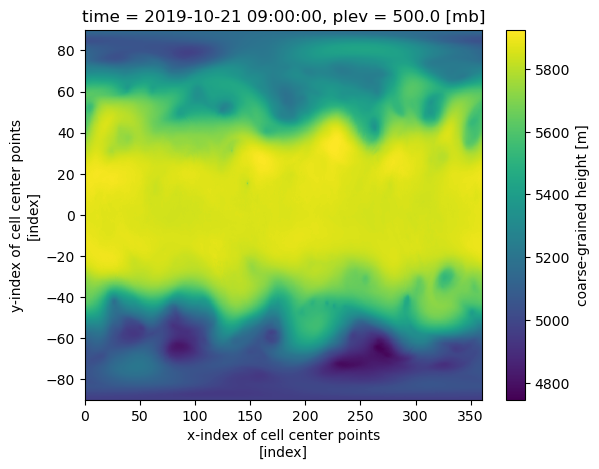

CPU times: user 975 ms, sys: 145 ms, total: 1.12 s
Wall time: 1.8 s


In [15]:
%%time

ds.h_plev_coarse.sel(plev=500).isel(time=10).plot()
plt.show()

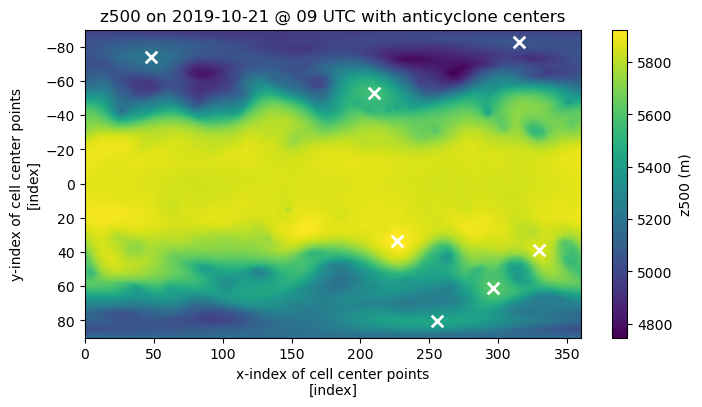

In [21]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# 1) load the stitched-nodes CSV
#    assume whitespace-delimited, no header; columns are:
#    i, j, lon, lat, psl, year, month, day, hour
cols = ['i','j','lon','lat','psl','year','month','day','hour']
df = pd.read_csv(
    '/scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/xsh24_TempestExtremes_anticyclones.csv',
    sep=r'\s+', names=cols, header=None
)

# 2) filter to 2019-10-21 @ 09 UTC
df0 = df.query('year==2019 & month==10 & day==21 & hour==9')

# 3) open your (coarsened) psl file and pick that timestamp
da = ds.h_plev_coarse.sel(plev=500).isel(time=10)

# 4) plot and overlay white × at each (lon,lat) from the CSV
fig, ax = plt.subplots(figsize=(8, 4))
im = da.plot(
    ax=ax, 
    yincrease=False,        # make latitude orient correctly
    cbar_kwargs={'label':'z500 (m)'}
)
ax.scatter(
    df0['lon'], df0['lat'],
    marker='x', s=70, linewidths=2,
    color='white',
    transform=plt.get_current_fig_manager().canvas.figure.axes[0].transData
)
ax.set_title('z500 on 2019-10-21 @ 09 UTC with anticyclone centers')
plt.show()

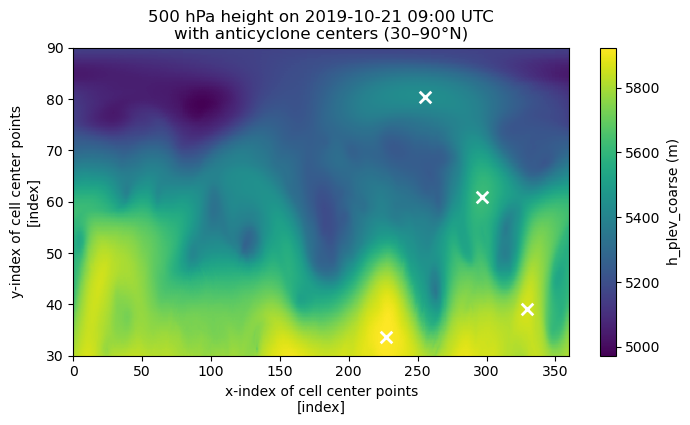

In [22]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# 1) load the stitched-nodes CSV
cols = ['i','j','lon','lat','h_plev','year','month','day','hour']
df = pd.read_csv(
    '/scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/'
    'xsh24_TempestExtremes_anticyclones.csv',
    sep=r'\s+', names=cols, header=None
)

# 2) filter to 2019-10-21 @ 09 UTC AND only latitudes 30–90°N
df0 = df.query(
    'year==2019 & month==10 & day==21 & hour==9 '
    '& lat>=30 & lat<=90'
)

# 3) open your coarsened h_plev dataset and select plev=500 + time + lat slice
da = ds.h_plev_coarse.sel(plev=500).isel(time=10).sel(grid_yt_coarse=slice(30, 90))


# 4) plot and overlay white × at each (lon,lat) from the filtered CSV
fig, ax = plt.subplots(figsize=(8, 4))
im = da.plot(
    ax=ax,
    yincrease=False,
    cbar_kwargs={'label':'h_plev_coarse (m)'}
)

# scatter only those points within 30–90°N
ax.scatter(
    df0['lon'], df0['lat'],
    marker='x', s=70, linewidths=2,
    color='white',
    transform=ax.transData
)

# enforce map limits to 30–90°N
ax.set_ylim(30, 90)  # because yincrease=False
ax.set_title('500 hPa height on 2019-10-21 09:00 UTC\nwith anticyclone centers (30–90°N)')
plt.show()


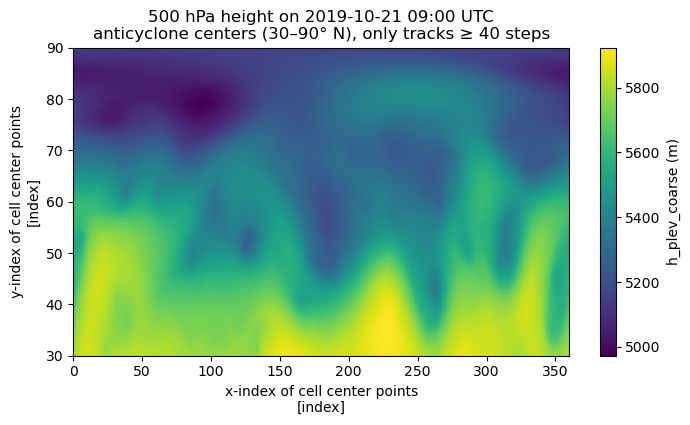

In [24]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# 1) load the stitched-nodes CSV
cols = ['i','j','lon','lat','h_plev','year','month','day','hour']
csv_file = (
    '/scratch/cimes/xy4043/tracks/'
    'tracks_anticyc_3hrly/xsh24_TempestExtremes_anticyclones.csv'
)
df = pd.read_csv(csv_file, sep=r'\s+', names=cols, header=None)

# 1b) keep only tracks whose “start” line has length ≥ 40, drop the 'start' rows
df['is_start'] = df['i'].astype(str) == 'start'
# assign a track-ID by cumulatively counting starts
df['track_id'] = df['is_start'].cumsum()

# extract each track’s length from its 'start' record (that's in column 'j')
lengths = (
    df.loc[df['is_start'], ['track_id','j']]
      .set_index('track_id')['j']
)
valid_tracks = lengths[lengths >= 40].index

# now keep only non-start rows belonging to a valid track
df = df[df['track_id'].isin(valid_tracks) & ~df['is_start']].copy()
df.drop(columns=['is_start'], inplace=True)


# 2) filter to 2019-10-21 09 UTC AND latitudes 30–90° N
df0 = df.query(
    'year==2019 & month==10 & day==21 & hour==9 & lat>=30 & lat<=90'
)


# 3) open your coarsened dataset and pick out 500 hPa, that same time slice
da = ds.h_plev_coarse.sel(plev=500).isel(time=10).sel(grid_yt_coarse=slice(30, 90))


# 4) plot field + white × markers
fig, ax = plt.subplots(figsize=(8, 4))
im = da.plot(
    ax=ax,
    yincrease=False,
    cbar_kwargs={'label':'h_plev_coarse (m)'}
)
ax.scatter(
    df0['lon'], df0['lat'],
    marker='x', s=70, linewidths=2,
    color='white',
    transform=ax.transData
)
ax.set_ylim(30, 90)
ax.set_title(
    '500 hPa height on 2019-10-21 09:00 UTC\n'
    'anticyclone centers (30–90° N), only tracks ≥ 40 steps'
)
plt.show()


In [25]:
df

,i,j,lon,lat,h_plev,year,month,day,hour,track_id
794,428,676,107.125,79.125,5129.670,2019,11.0,8.0,12.0,80
795,432,672,108.125,78.125,5127.256,2019,11.0,8.0,15.0,80
796,431,670,107.875,77.625,5124.819,2019,11.0,8.0,18.0,80
797,436,666,109.125,76.625,5124.958,2019,11.0,8.0,21.0,80
798,442,664,110.625,76.125,5124.252,2019,11.0,9.0,0.0,80
...,...,...,...,...,...,...,...,...,...,...
13448,1291,52,322.875,-76.875,5218.587,2021,1.0,6.0,6.0,1197
13449,1288,51,322.125,-77.125,5228.729,2021,1.0,6.0,9.0,1197
13450,1284,49,321.125,-77.625,5235.390,2021,1.0,6.0,12.0,1197
13451,1281,46,320.375,-78.375,5239.702,2021,1.0,6.0,15.0,1197


In [28]:
#!/usr/bin/env python
"""
Convert TempestExtremes ‘raw’ anticyclone list (with ‘start …’ rows) into a
tidy CSV: track_id, year, month, day, hour, i, j, lon, lat, z500
"""

import pathlib
import pandas as pd

###############################################################################
# paths – edit if needed
###############################################################################
RAW_TXT = (
    '/scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/'
    'xsh24_TempestExtremes_anticyclones.csv'
)
CLEAN_CSV = (
    '/scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/'
    'reformatted_anticyclones_with_z500.csv'
)

###############################################################################
# read, parse, assign track_id
###############################################################################
records = []
track_id = -1

with open(RAW_TXT, 'r') as fh:
    for ln in fh:
        ln = ln.strip()
        if not ln:
            continue                                          # skip blank lines
        parts = ln.split()
        if parts[0].lower() == 'start':
            # new track begins → increment track_id
            track_id += 1
            continue

        # data line:        i    j      lon        lat           h_plev   y m d h
        if len(parts) != 9:
            raise ValueError(f'Unexpected number of columns ({len(parts)}) '
                             f'in line:\n{ln}')

        i, j, lon, lat, h_plev, yr, mo, dy, hr = parts
        records.append(
            dict(
                track_id     = track_id,
                year         = int(yr),
                month        = int(mo),
                day          = int(dy),
                hour         = int(hr),
                i            = int(i),
                j            = int(j),
                lon          = float(lon),
                lat          = float(lat),
                z500         = float(h_plev)        # simply rename h_plev → z500
            )
        )

###############################################################################
# build DataFrame & write out
###############################################################################
df = pd.DataFrame.from_records(records)

df.to_csv(
    CLEAN_CSV,
    index=False,
    columns=[
        'track_id', 'year', 'month', 'day', 'hour',
        'i', 'j', 'lon', 'lat', 'z500'
    ]
)

print(f'✔ Reformatted tracks written to {CLEAN_CSV}')


✔ Reformatted tracks written to /scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/reformatted_anticyclones_with_z500.csv


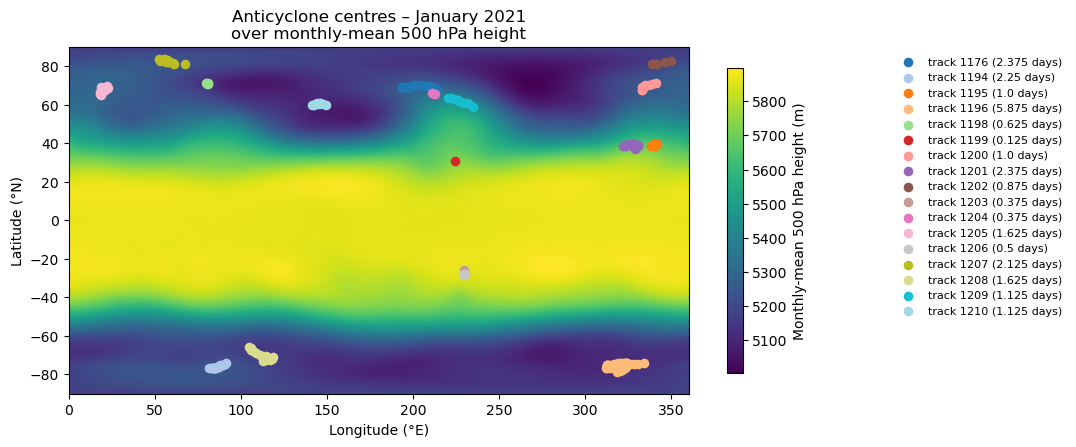

In [26]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Monthly-mean 500-hPa height for 2021-12 with December anticyclone centres.

* Input track file  : reformatted_anticyclones_with_z500.csv
* Input model field : ds['h_plev_coarse'] already opened in memory OR reopened
"""

import pathlib
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

###############################################################################
# ─── 1. paths & options ──────────────────────────────────────────────────────
###############################################################################
TRACK_CSV = (
    '/scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/reformatted_anticyclones_with_z500.csv'
)

# If `ds` is *already* in memory (e.g. an interactive session / notebook),
# set OPEN_DATASET = False and drop the path below.
OPEN_DATASET = True

PLEV_VAL  = 500.0                                           # hPa
DATE_FROM = '2020-01-01'
DATE_TO   = '2020-01-31'

###############################################################################
# ─── 2. load the anticyclone catalogue ───────────────────────────────────────
###############################################################################
cols = [
    'track_id','year','month','day','hour',
    'i','j','lon','lat','z500'
]
tracks = pd.read_csv(TRACK_CSV, usecols=cols)

# keep only December 2021
tracks = tracks.query('year==2021 & month==1')
# build a timestamp column (useful for debugging / future queries)
tracks['time'] = pd.to_datetime(tracks[['year','month','day','hour']])

###############################################################################
# ─── 3. open / select the 500-hPa field ───────────────────────────────────────
###############################################################################
da500 = (
    ds['h_plev_coarse']
      .sel(plev=PLEV_VAL)                 # pick 500 hPa level
      .sel(time=slice(DATE_FROM, DATE_TO))                  # December 2021 only
      .mean('time')                                         # monthly mean
)

###############################################################################
# ─── 4. plotting ──────────────────────────────────────────────────────────────
###############################################################################
fig, ax = plt.subplots(figsize=(10, 4.5))

# draw the field first
lon = da500['grid_xt_coarse']
lat = da500['grid_yt_coarse']
# pcolormesh needs the 2-D mesh of lon/lat
Lon2d, Lat2d = np.meshgrid(lon, lat)

pc = ax.pcolormesh(
    Lon2d, Lat2d, da500.values,
    shading='auto',
)
cb = fig.colorbar(pc, ax=ax, shrink=0.88)
cb.set_label('Monthly-mean 500 hPa height (m)')

# equally spaced colours (one per track_id)
track_ids = tracks['track_id'].unique()
cmap = get_cmap('tab20', len(track_ids))


for n, tid in enumerate(track_ids):
    sub = tracks[tracks['track_id'] == tid]
    nsteps = len(sub)
    ax.scatter(
        sub['lon'], sub['lat'],
        s=35, marker='o', color=cmap(n),
        label=f'track {tid} ({nsteps/8} days)'
    )

ax.set_xlim(0, 360);  ax.set_xlabel('Longitude (°E)')
ax.set_ylim(-90,  90); ax.set_ylabel('Latitude (°N)')
ax.set_title('Anticyclone centres – January 2021\n'
             'over monthly-mean 500 hPa height')
# put legend outside if there are few tracks; otherwise comment this line
ax.legend(bbox_to_anchor=(1.32, 1), loc='upper left', frameon=False, fontsize=8)

# plt.tight_layout()
plt.show()



--> The keys in the returned dictionary of datasets are constructed as follows:
	'experiment_id.member_id'


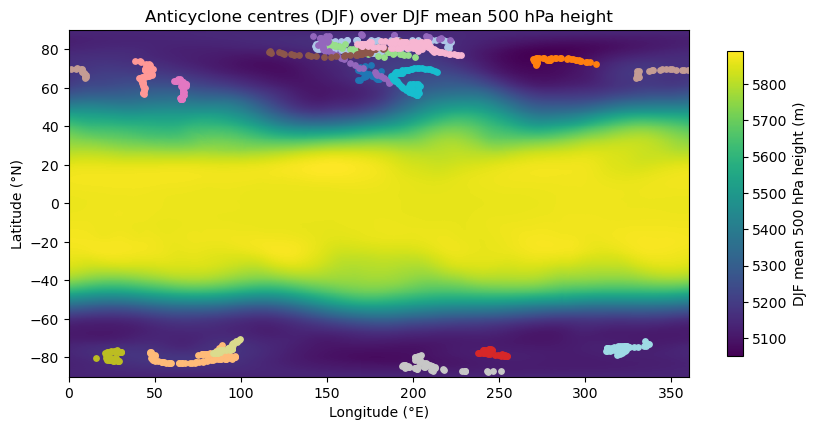

In [32]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Seasonal‐mean 500 hPa height for DJF with anticyclone centres.

  • Input track file  : reformatted_anticyclones_with_z500.csv
  • Input model field : ds['h_plev_coarse'] (will be opened here)
"""
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import intake,yaml,os
import intake_esm

# result of build_xshield_cat.ipynb
col_url = "/home/tmerlis/hackathon/catbuild/xsh24_cat.json"
col = intake.open_esm_datastore(col_url)
cat = col.search(variable_id = 'h_plev_coarse_C3072_1440x720')
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time':5}, 'decode_times': True})
ds = dset_dict['20191020.00Z.C3072.xs24v2.GLOBALFV3']

# ─── 1. paths & options ──────────────────────────────────────────────────────
TRACK_CSV    = '/scratch/cimes/xy4043/tracks/tracks_anticyc_3hrly/' \
               'reformatted_anticyclones_with_z500.csv'
PLEV_VAL     = 500.0    # hPa
MIN_STEPS    = 40       # ≥5 days at 3-hourly → 5×8=40
SEASON_MONTHS = [12, 1, 2]

# ─── 2. load & filter tracks ─────────────────────────────────────────────────
cols = ['track_id','year','month','day','hour','i','j','lon','lat','z500']
df = pd.read_csv(TRACK_CSV, usecols=cols)
df['time'] = pd.to_datetime(df[['year','month','day','hour']])

# only keep track_ids with ≥ MIN_STEPS total
counts = df.groupby('track_id').size()
valid_ids = counts[counts >= MIN_STEPS].index
df = df[df['track_id'].isin(valid_ids)]

# only keep the DJF steps
df = df[df['time'].dt.month.isin(SEASON_MONTHS)]

# ─── 3. open & compute DJF seasonal mean ────────────────────────────────────
z500 = ds['h_plev_coarse'].sel(plev=PLEV_VAL)

# select only DJF months, then average over time
z500_djf = (
    z500
    .sel(time=z500['time'].dt.month.isin(SEASON_MONTHS))
    .mean('time')
)

# ─── 4. plot the seasonal mean & tracks ─────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 4.5))

# background: DJF mean
lon = z500_djf['grid_xt_coarse']
lat = z500_djf['grid_yt_coarse']
Lon2d, Lat2d = np.meshgrid(lon, lat)
pc = ax.pcolormesh(Lon2d, Lat2d, z500_djf.values, shading='auto')
cb = fig.colorbar(pc, ax=ax, shrink=0.88)
cb.set_label('DJF mean 500 hPa height (m)')

# overlay each track in its own colour
track_ids = df['track_id'].unique()
cmap = get_cmap('tab20', len(track_ids))

for n, tid in enumerate(track_ids):
    sub = df[df['track_id'] == tid]
    nsteps = len(sub)
    ax.scatter(
        sub['lon'], sub['lat'],
        s=15, marker='o', color=cmap(n),
        label=f'track {tid} ({(nsteps/8):.1f} days)'
    )
    

# axes & legend
ax.set_xlim(0, 360)
ax.set_xlabel('Longitude (°E)')
ax.set_ylim(-90,  90)
ax.set_ylabel('Latitude (°N)')
ax.set_title('Anticyclone centres (DJF) over DJF mean 500 hPa height')
if len(track_ids) <= 12:
    ax.legend(
      bbox_to_anchor=(1.25,1), loc='upper left',
      frameon=False, fontsize=8
    )

# plt.tight_layout()
plt.show()


In [31]:
track_ids

array([ 143,  184,  189,  208,  218,  224,  271,  288,  316,  334,  344,
       1113, 1138, 1160, 1174, 1176, 1196])

## STOP HERE

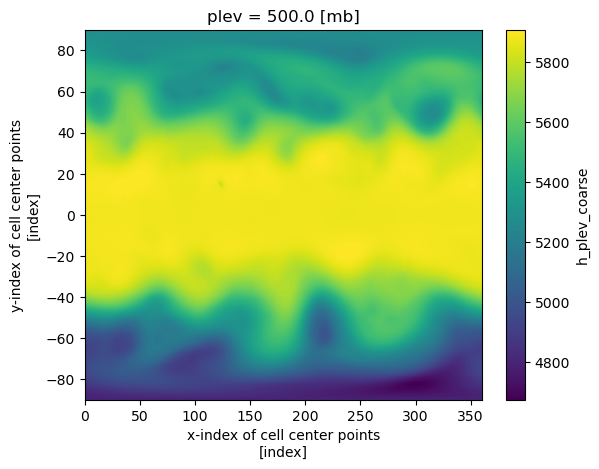

CPU times: user 1.44 s, sys: 267 ms, total: 1.7 s
Wall time: 6.78 s


In [14]:
%%time

ds.h_plev_coarse.sel(plev=500).sel(time=slice('2020-05-01', '2020-05-02')).mean(dim='time').plot()
plt.show()

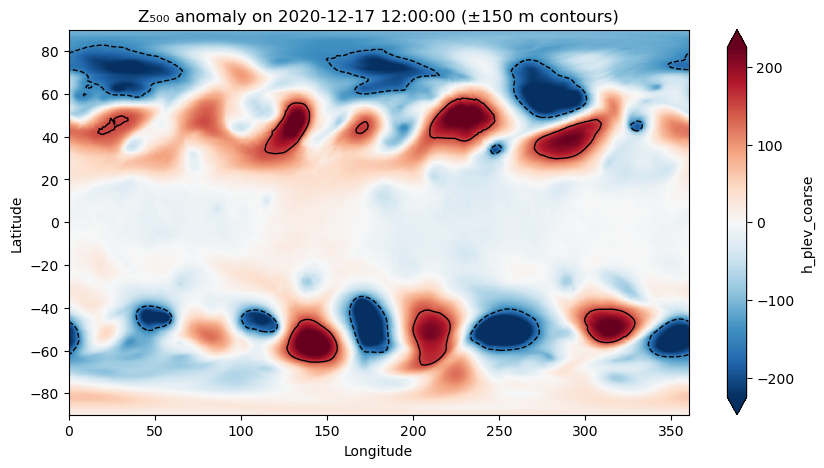

CPU times: user 1min 22s, sys: 25.1 s, total: 1min 47s
Wall time: 5min 13s


In [15]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fix the random seed
np.random.seed(42)

# 2. Select and filter to DJF @500 hPa
z500 = ds.h_plev_coarse.sel(plev=500)
z500_djf = z500.where(z500['time'].dt.season == 'DJF', drop=True)

# 3. DJF climatology
clim = z500_djf.mean(dim='time')

# 4. Random timestamp within DJF period
n_times = z500_djf.sizes['time']
idx = np.random.randint(n_times)
rand_time = z500_djf['time'][idx].values
rand_pd = rand_time

# 5. Snapshot & anomaly
snap = z500.sel(time=rand_time)
anomaly = (snap - clim).squeeze()  # ensure a 2-D (lat, lon) DataArray

# 6. Plot the anomaly directly in latitude–longitude space (no map projection)
quadmesh = anomaly.plot(
    cmap="RdBu_r",
    robust=True,
    figsize=(10, 5),
    add_colorbar=True,
)
ax = quadmesh.axes

# 7. Overlay ±150 m contours (solid positive, dashed negative)
lon2d, lat2d = np.meshgrid(anomaly['grid_xt_coarse'].values, anomaly['grid_yt_coarse'].values)
cs_pos = ax.contour(lon2d, lat2d, anomaly.values, levels=[150], colors="k", linestyles="solid", linewidths=1)
cs_neg = ax.contour(lon2d, lat2d, anomaly.values, levels=[-150], colors="k", linestyles="dashed", linewidths=1)

# 8. Formatting
ax.set_title(f"Z₅₀₀ anomaly on {rand_pd} (±150 m contours)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()



Weighted centroid: For each retained region, computes

$$
(\bar{\lambda}, \bar{\phi})=\frac{\sum_i w_i\left(\lambda_i, \phi_i\right)}{\sum_i w_i}, \quad w_i=\mid z_{500, i}-\text { sign } \times \text { level } \mid
$$

and plots a black $\times$ (positive anomalies) or white $\times$ (negative anomalies).

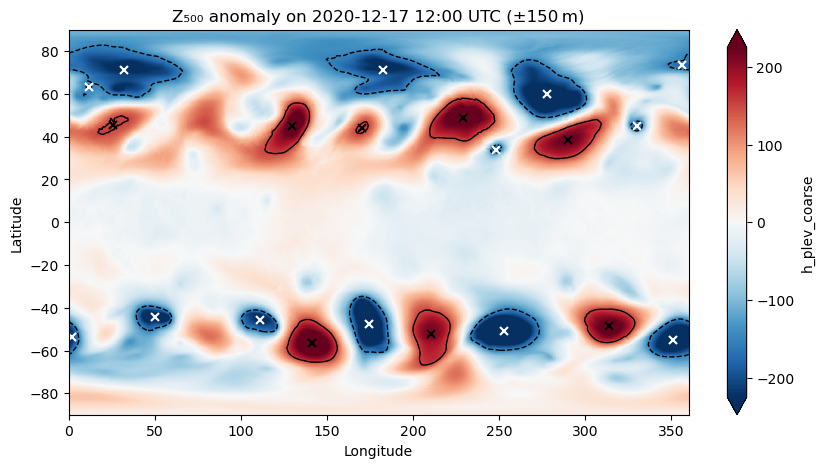

CPU times: user 1min 2s, sys: 8.53 s, total: 1min 10s
Wall time: 7min 12s


In [20]:
%%time
"""Plot Z500 500‑hPa height anomaly with contour filtering / centroids.

Key fixes after FutureCancelledError:
  • Compute the DJF climatology and the single‑time snapshot eagerly (NumPy),
    avoiding Dask in the plotting phase → no lost‑dependency errors.
  • Detect whatever lat/lon (or grid_xt/grid_yt) dimension names exist and
    use them consistently for chunking, meshgrid creation, and plotting.
  • Memory budget ≤ 40 GB still honoured by restricting the largest in‑memory
    object to the 2‑D climatology field (typically < 500 MB for coarse grids).
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

# ─── Optional Cartopy for map transforms ────────────────────────────────────
try:
    import cartopy.crs as ccrs  # type: ignore
except ImportError:
    ccrs = None

# ─── Dask (only for climatology) with 32 GB cap ─────────────────────────────
try:
    from dask.distributed import Client, progress  # type: ignore
    client = Client(n_workers=1, threads_per_worker=4, memory_limit="32GB")
    USING_DASK = True
except Exception:
    USING_DASK = False
    client = None

# ----------------------------------------------------------------------------
# Utility helpers
# ----------------------------------------------------------------------------

def detect_coord(da, candidates):
    """Return the first coordinate name in *da* that matches any *candidates*."""
    for cand in candidates:
        for c in da.coords:
            if c.lower() == cand.lower():
                return c
    # fallback: substring search
    for cand in candidates:
        for c in da.coords:
            if cand.lower() in c.lower():
                return c
    raise ValueError("No matching coordinate found for " + ", ".join(candidates))


def plot_contours(anom, *, level=150, min_box_deg=3.0,
                  filter_small=True, mark_centroids=True, ax=None):

    if ax is None:
        ax = plt.gca()

    lon_name = detect_coord(anom, ["lon", "grid_xt", "grid_xt_coarse", "x"])
    lat_name = detect_coord(anom, ["lat", "grid_yt", "grid_yt_coarse", "y"])
    lon = anom[lon_name].values
    lat = anom[lat_name].values
    data_orig = anom.values

    # ── 1.  Make the grid periodic in longitude  ─────────────────────────
    lon_wrap = np.concatenate([lon, lon[:1] + 360.0])        # 0 … 360+Δλ
    data     = np.concatenate([data_orig, data_orig[:, :1]], axis=1)

    lon2d, lat2d = np.meshgrid(lon_wrap, lat, indexing="xy")

    # ── 2.  Masks are built from the *wrapped* field  ────────────────────
    pos_mask = data >= level
    neg_mask = data <= -level

    def _regions(mask, sign):
        if not mask.any():
            return []
        lbl, nreg = ndi.label(mask, structure=np.ones((3, 3)))
        out = []
        for n in range(1, nreg + 1):
            y, x = np.where(lbl == n)
            if filter_small and (
                np.ptp(lat2d[y, x]) < min_box_deg
                and np.ptp(lon2d[y, x]) < min_box_deg
            ):
                continue
            w  = np.abs(data[y, x] - sign * level)
            yc = float((w * lat2d[y, x]).sum() / w.sum())
            xc = float((w * lon2d[y, x]).sum() / w.sum())
            out.append((y, x, yc, xc))
        return out

    # ── 3.  First draw the global isolines  ──────────────────────────────
    for sign, ls in [(+1, "solid"), (-1, "dashed")]:
        ax.contour(lon2d, lat2d, data,
                   levels=[sign * level],
                   colors="k", linestyles=ls, linewidths=1)

    # ── 4.  Then (optionally) filter small regions & mark centroids ─────
    for mask, sign, ls in [(pos_mask, +1, "solid"), (neg_mask, -1, "dashed")]:
        for y, x, yc, xc in _regions(mask, sign):
            ax.tricontour(lon2d[y, x], lat2d[y, x], data[y, x],
                          levels=[sign * level],
                          colors="k", linestyles=ls)
            if mark_centroids:
                ax.plot(xc, yc, "x", ms=6, mew=1.5,
                        color="k" if sign == +1 else "white")

    ax.set_zorder(2)


# ----------------------------------------------------------------------------
# Reproducibility and dataset prep
# ----------------------------------------------------------------------------
np.random.seed(42)

# Select the 500‑hPa height field
z500 = ds.h_plev_coarse.sel(plev=500)

# Rechunk (only if Dask) using whatever lat/lon dims we have
if USING_DASK:
    lat_dim = detect_coord(z500, ["lat", "grid_yt", "grid_yt_coarse", "y"])
    lon_dim = detect_coord(z500, ["lon", "grid_xt", "grid_xt_coarse", "x"])
    z500 = z500.chunk({"time": -1, lat_dim: 90, lon_dim: 180})

# Filter to DJF
z500_djf = z500.where(z500["time"].dt.season == "DJF", drop=True)

# ----------------------------------------------------------------------------
# Climatology (eager, NumPy) – avoids Dask refs during plotting
# ----------------------------------------------------------------------------
try:
    clim  # noqa: F821  # re‑use if already in memory
except NameError:
    clim = z500_djf.mean(dim="time")
    if USING_DASK:
        clim = clim.compute()
        client.close()  # free scheduler memory
        USING_DASK = False

# ----------------------------------------------------------------------------
# Random DJF snapshot and anomaly (NumPy)
# ----------------------------------------------------------------------------
idx = np.random.randint(z500_djf.sizes["time"])
rand_time = z500_djf["time"][idx].values

snap = z500.sel(time=rand_time).compute()
anomaly = (snap - clim).squeeze()  # 2‑D DataArray (NumPy‑backed)

# ----------------------------------------------------------------------------
# Plot
# ----------------------------------------------------------------------------
quadmesh = anomaly.plot(cmap="RdBu_r", robust=True, figsize=(10, 5), add_colorbar=True)
ax = quadmesh.axes

plot_contours(anomaly, level=150, min_box_deg=3.0, filter_small=True,
              mark_centroids=True, ax=ax)

ax.set_title(f"Z₅₀₀ anomaly on {rand_time:%Y-%m-%d %H:%M UTC} (±150 m)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()
